# LEVEL 2 TASK

# TITANIC SURVIVAL PREDICTION

• Utilize the Titanic dataset to construct a predictive model determining if a
passenger survived the Titanic disaster.

• This project serves as an introductory exercise, offering accessible data for
analysis.

• The dataset comprises passenger details encompassing age, gender, ticket
class, fare, cabin, and survival outcome.

• By applying this data, you can embark on a classic project that provides
insights into survival patterns among Titanic passengers.

##### Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import os
import scipy as stats
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

##### Importing the DataSet

In [2]:
df=pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Observations: The dataset contains 12 columns and 418 rows. Both numerical and categorical values are present. Survived column is the 'Label' and rest are the features.

Categorical features: In the dataset Survived, Sex and Embarked have categorical data also Pclass has the ordinal data.

Numerical features: Here Age and Fare are continuous data, SibSp and Parch are discrete data.

##### Exploratory Data Analysis

In [3]:
#checking the dimension of the dataset
df.shape

(418, 12)

In [4]:
#checking the types of the dataset
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Checking the overview of the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

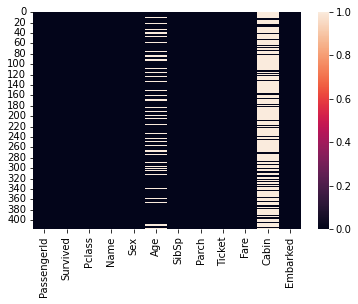

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#Checking uniqueness of the label
df['Survived'].unique()

array([0, 1], dtype=int64)

In [11]:
#Checking the counts of unique numbers of label
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Data Visualization

##### Uni-Variate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

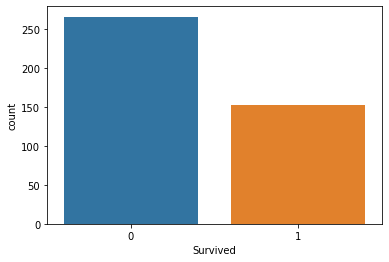

In [13]:
#visualizing the count of survivors

sns.countplot(df['Survived'])

3    218
1    107
2     93
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

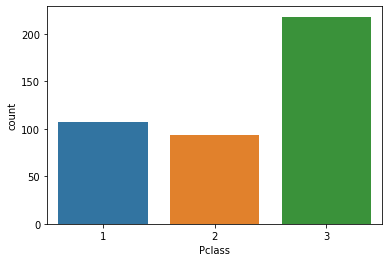

In [14]:
#checking the survival rate in passenger class
print(df['Pclass'].value_counts())
sns.countplot(df['Pclass'])

male      266
female    152
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

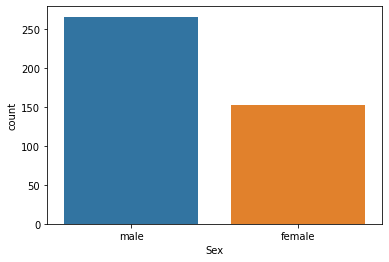

In [15]:
#checking the counts for sex feature
print(df['Sex'].value_counts())
sns.countplot(df['Sex'])

S    270
C    102
Q     46
Name: Embarked, dtype: int64


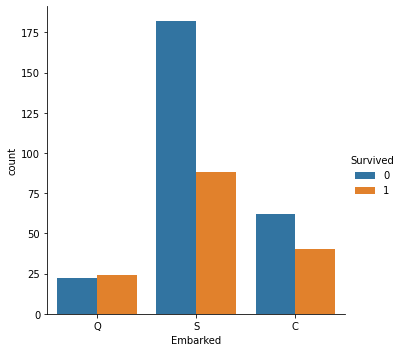

In [16]:
#checking the counts of embarked
print(df['Embarked'].value_counts())
sns.factorplot('Embarked', kind='count', data=df, hue='Survived')

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64


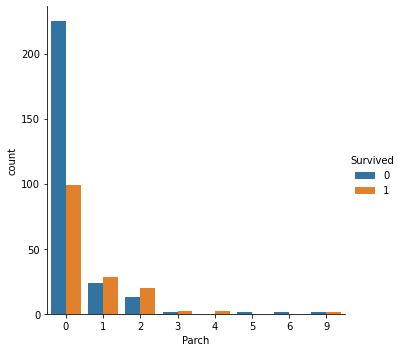

In [17]:
#Checking the count in the Parched

print(df["Parch"].value_counts())
sns.factorplot('Parch',kind='count',data=df,hue='Survived')

#### Distribution of Skewness

<AxesSubplot:xlabel='Age', ylabel='Density'>

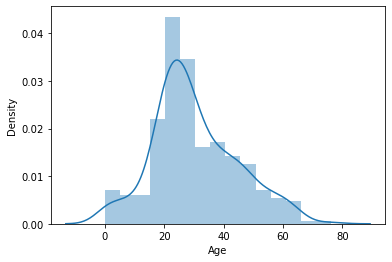

In [18]:
#Checking how the dataset is distributed

sns.distplot(df["Age"])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

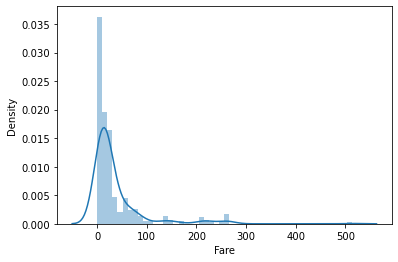

In [20]:
sns.distplot(df['Fare'])

##### Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between Pclass and Age'}, xlabel='Pclass', ylabel='Age'>

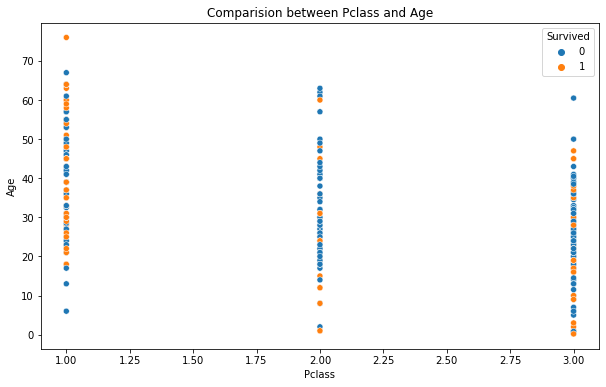

In [21]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Pclass and Age')
sns.scatterplot(df['Pclass'],df['Age'],hue=df["Survived"])

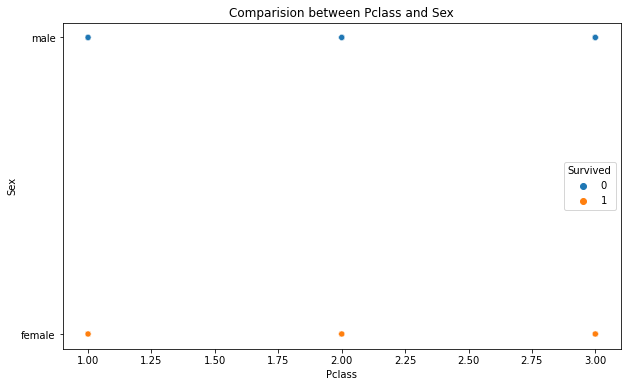

In [22]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Pclass and Sex')
sns.scatterplot(df['Pclass'],df['Sex'],hue=df["Survived"]);

<AxesSubplot:title={'center':'Comparision between Sex and Parch'}, xlabel='Sex', ylabel='Parch'>

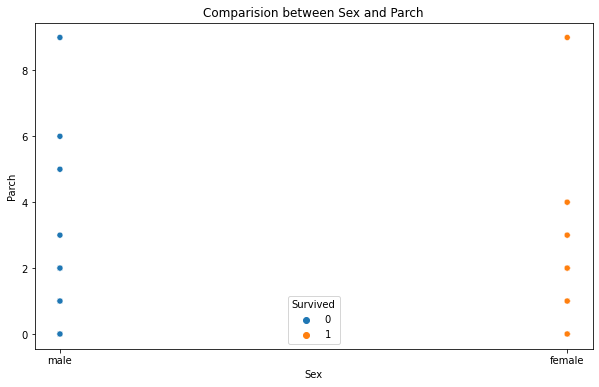

In [23]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Sex and Parch')
sns.scatterplot(df['Sex'],df['Parch'],hue=df["Survived"])

<AxesSubplot:title={'center':'Comparision between Age and Embarked'}, xlabel='Embarked', ylabel='Age'>

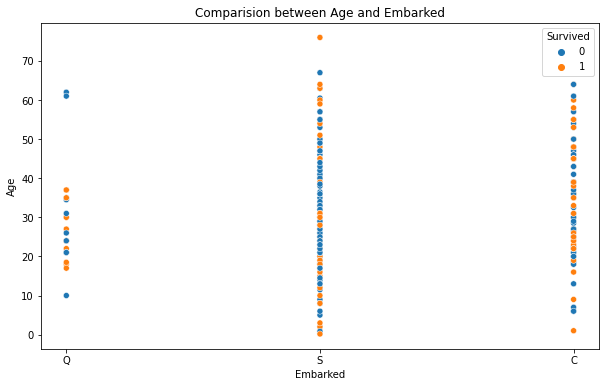

In [24]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Embarked')
sns.scatterplot(df['Embarked'],df['Age'],hue=df["Survived"])

<AxesSubplot:title={'center':'Comparision between Age and Fare'}, xlabel='Age', ylabel='Fare'>

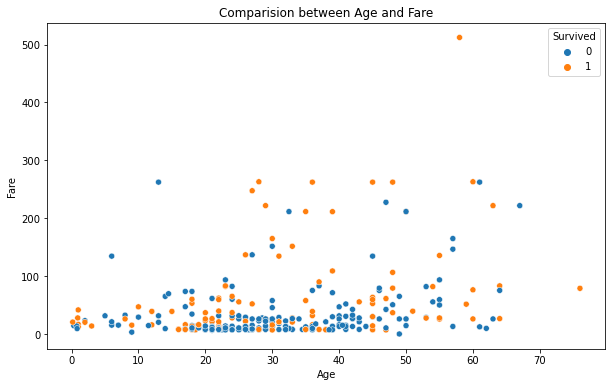

In [25]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Fare')
sns.scatterplot(df['Age'],df['Fare'],hue=df["Survived"])

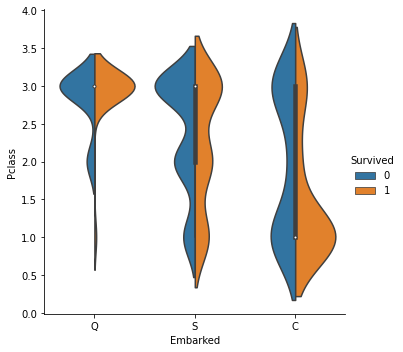

In [26]:
# Let's plot catplot for Embarked and Pclass
sns.catplot(x = "Embarked", y = "Pclass", hue = "Survived", kind = "violin", data=df, split=True)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

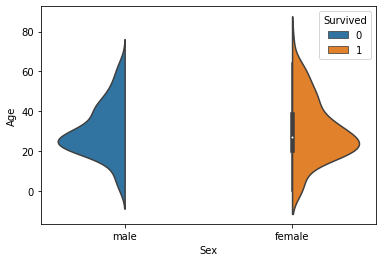

In [27]:
# Let's plot violinplot for Age and Sex
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)

##### Multi-Variate Analysis

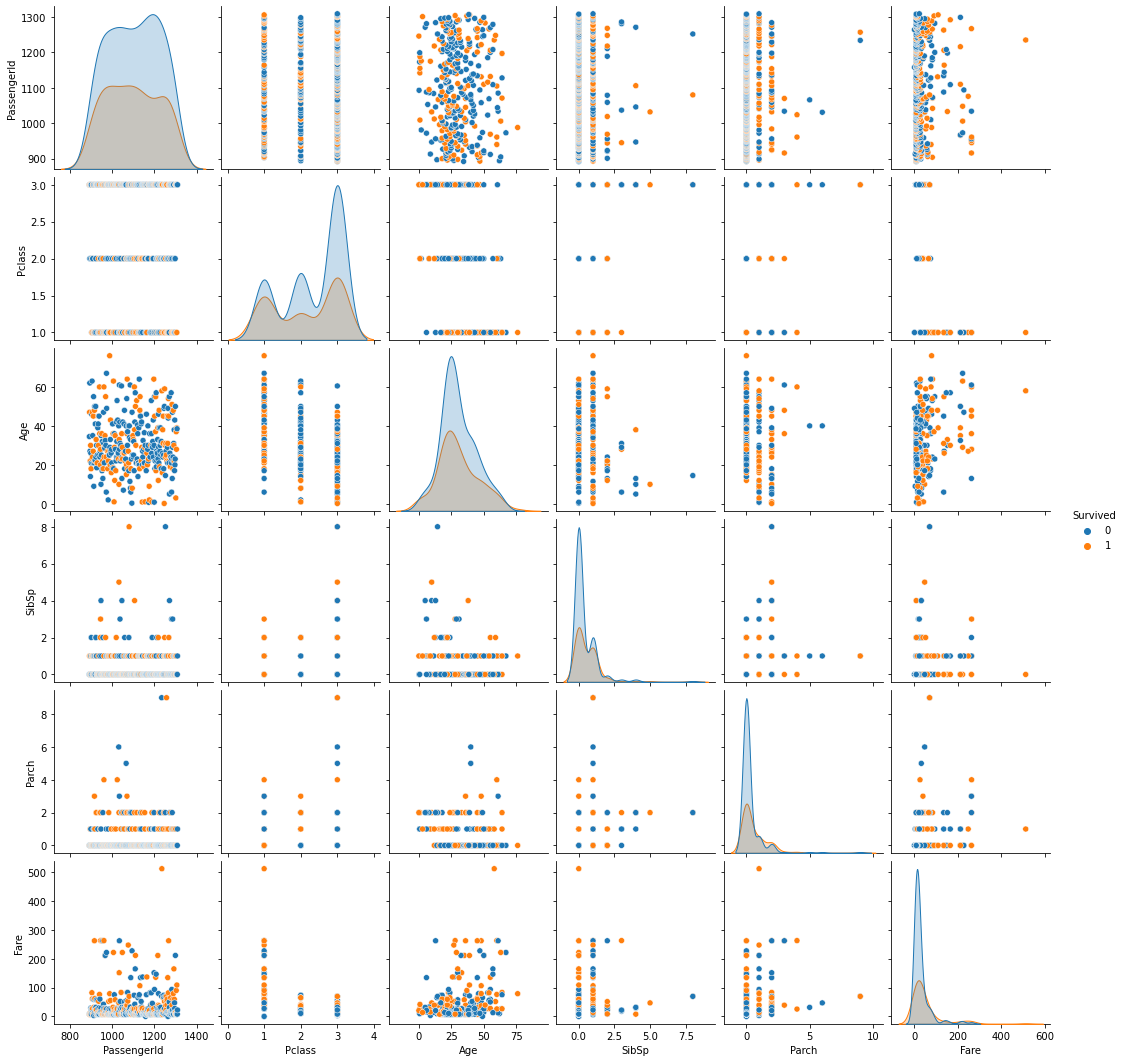

In [28]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Survived")

#### Correlation between the target variable and independent variables using HEAT map

In [29]:
cor = df.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'PassengerId'),
  Text(0, 1.5, 'Survived'),
  Text(0, 2.5, 'Pclass'),
  Text(0, 3.5, 'Age'),
  Text(0, 4.5, 'SibSp'),
  Text(0, 5.5, 'Parch'),
  Text(0, 6.5, 'Fare')])

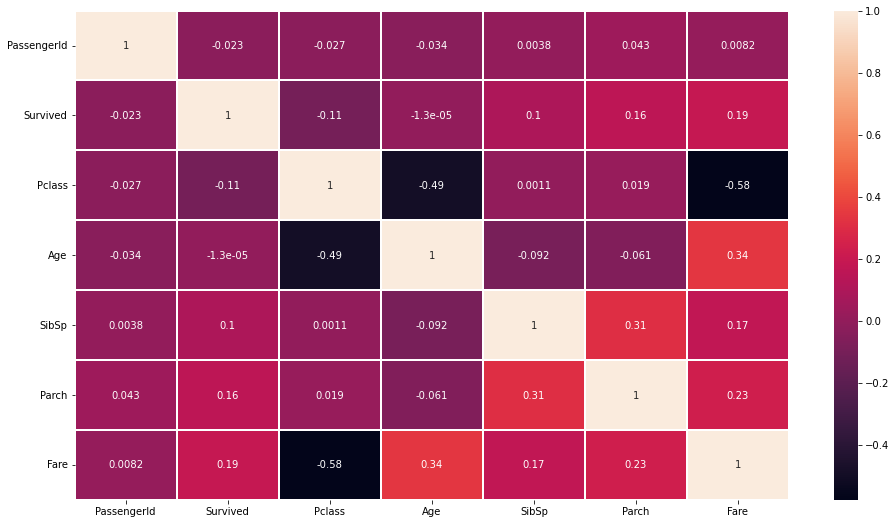

In [30]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0)

In [31]:
cor['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.191514
Parch          0.159120
SibSp          0.099943
Age           -0.000013
PassengerId   -0.023245
Pclass        -0.108615
Name: Survived, dtype: float64

##### Visualizing the correlation between label and features using bar plot

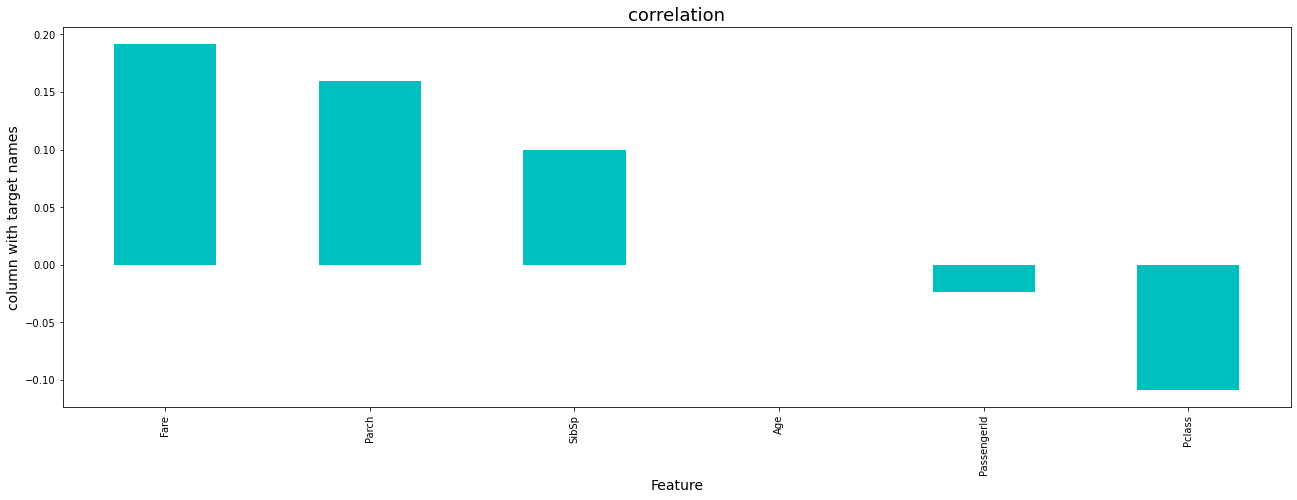

In [32]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

#### Dropping irrelevant column

In [33]:
# Dropping PassengerId column
df.drop('PassengerId', axis=1, inplace = True )
df.drop('Name',axis=1, inplace=True)   # Name has no important to build our madel

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,female,22.0,1,1,3101298,12.2875,NaN,S


##### Identifying the Outliers

<AxesSubplot:xlabel='Age'>

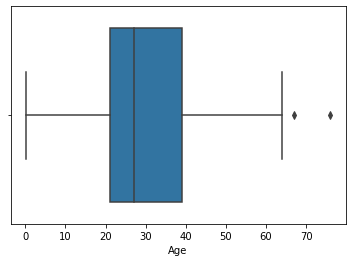

In [38]:
sns.boxplot(df["Age"])

<AxesSubplot:xlabel='Parch'>

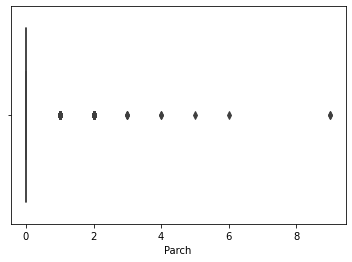

In [39]:
sns.boxplot(df["Parch"])

<AxesSubplot:xlabel='Fare'>

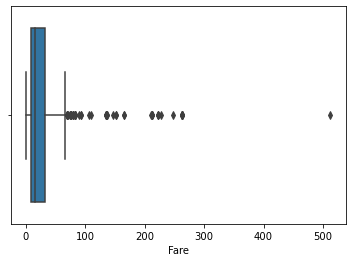

In [40]:
sns.boxplot(df["Fare"])

<AxesSubplot:xlabel='SibSp'>

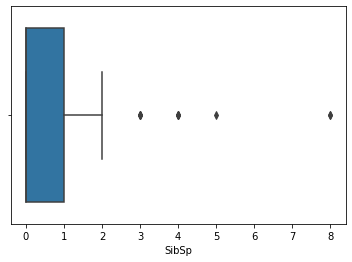

In [41]:
sns.boxplot(df["SibSp"])

###### Data Cleaning

In [42]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [43]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].mode()[0])
df['Cabin'] = df['Cabin'].fillna('U')
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

<AxesSubplot:>

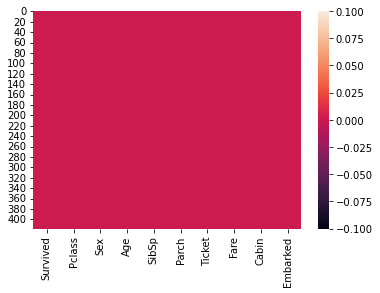

In [44]:
sns.heatmap(df.isnull())

### Removing Outliers

#### ZScore Method

In [45]:
 df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [46]:
variables = df[['Age','Fare']] # Removing outliers from only these two featuers as the other two are discreate.

In [47]:
z=np.abs(zscore(variables))

z

,Age,Fare
0,0.386231,0.497063
1,1.371370,0.511926
2,2.553537,0.463754
3,0.204852,0.482127
4,0.598908,0.417151
...,...,...
413,0.204852,0.493105
414,0.740881,1.314557
415,0.701476,0.507445
416,0.204852,0.493105


In [48]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,U,Q
1,1,3,female,47.0,1,0,363272,7.0000,U,S
2,0,2,male,62.0,0,0,240276,9.6875,U,Q
3,0,3,male,27.0,0,0,315154,8.6625,U,S
4,1,3,female,22.0,1,1,3101298,12.2875,U,S


In [49]:
new_df.shape

(399, 10)

#### Checking Skewness

In [50]:
new_df.skew()

Survived    0.638894
Pclass     -0.662743
Age         0.570841
SibSp       4.312087
Parch       5.039490
Fare        2.491409
dtype: float64

#### Removing Skewness using yeo-johnson method

In [51]:
skewed_features = ["SibSp","Parch","Fare"]

In [52]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [53]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

,SibSp,Parch,Fare
0,-0.666593,-0.520184,-0.883858
1,1.449605,-0.520184,-1.029387
2,-0.666593,-0.520184,-0.610695
3,-0.666593,-0.520184,-0.753471
4,1.449605,1.883531,-0.312778


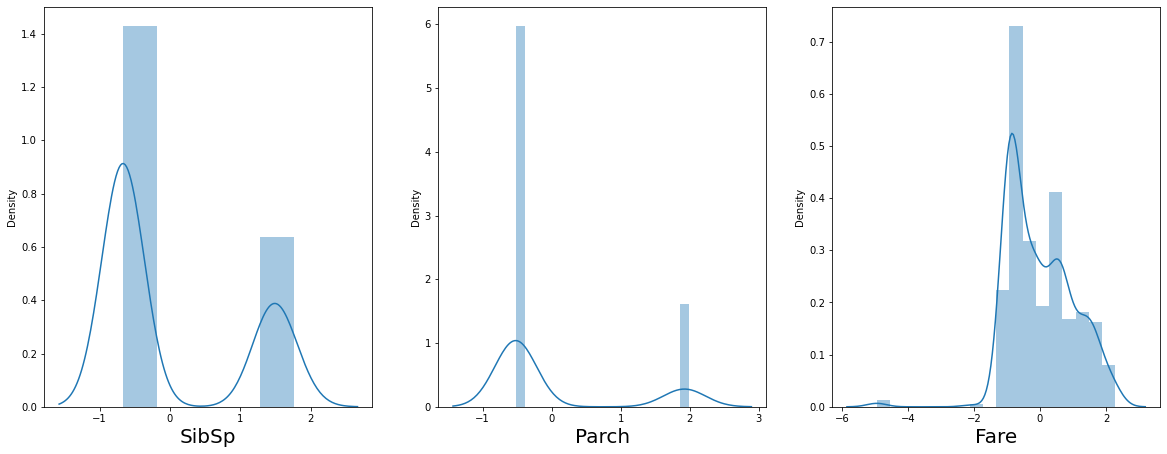

In [54]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()   

In [55]:
# Now let's check the skewness
new_df.skew().sort_values()

Pclass     -0.662743
Fare       -0.058378
Age         0.570841
Survived    0.638894
SibSp       0.843562
Parch       1.408503
dtype: float64

#### Encoding the data using Label Encoding

In [56]:
cols = ["Sex", "Ticket", "Cabin", "Embarked"]

In [57]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[cols]= new_df[cols].apply(LE.fit_transform)
new_df[cols].head()

,Sex,Ticket,Cabin,Embarked
0,1,148,64,1
1,0,217,64,2
2,1,70,64,1
3,1,143,64,2
4,0,134,64,2


##### Preprocessing the Data

#### Separating the independent and target variables into x and y

In [58]:
x = new_df.drop("Survived", axis=1)
y = new_df["Survived"]

In [59]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,34.5,-0.666593,-0.520184,148,-0.883858,64,1
1,3,0,47.0,1.449605,-0.520184,217,-1.029387,64,2
2,2,1,62.0,-0.666593,-0.520184,70,-0.610695,64,1
3,3,1,27.0,-0.666593,-0.520184,143,-0.753471,64,2
4,3,0,22.0,1.449605,1.883531,134,-0.312778,64,2


In [60]:
y.value_counts()

0    260
1    139
Name: Survived, dtype: int64

##### Oversampling

In [61]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [62]:
# Balancing the data using oversampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

# Checking the value counts again
y.value_counts()

0    260
1    260
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

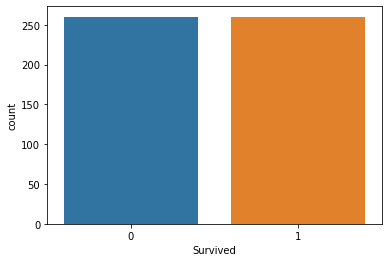

In [63]:
# Visualizing the data after oversampling
sns.countplot(y)

#### Scaling data using Min-Max Scaler

In [64]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,1.0,0.537835,0.000000,0.000000,0.419263,0.561847,1.0,0.5
1,1.0,0.0,0.733668,0.874019,0.000000,0.614731,0.541726,1.0,1.0
2,0.5,1.0,0.968667,0.000000,0.000000,0.198300,0.599616,1.0,0.5
3,1.0,1.0,0.420335,0.000000,0.000000,0.405099,0.579875,1.0,1.0
4,1.0,0.0,0.342002,0.874019,0.959883,0.379603,0.640807,1.0,1.0


In [65]:
x.shape,y.shape

((520, 9), (520,))

#### Modelling

#### Finding the best random state

In [66]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  1.0  on Random_state  1


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

#### Logistic Regression

In [68]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

1.0
[[73  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        83

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

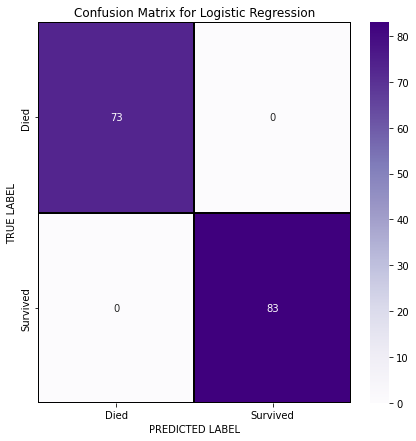

In [69]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')

##### Decision Tree Classifier

In [70]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

1.0
[[73  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        83

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

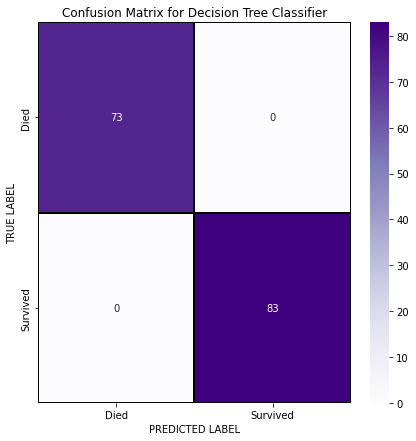

In [71]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

##### Random Forest Classifier

In [72]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

1.0
[[73  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        83

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

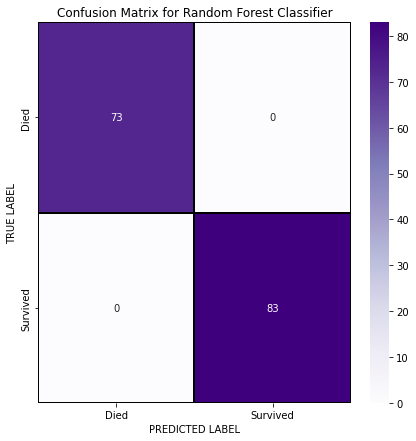

In [73]:
# Lets plot confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')

#### Support Vector Machine Classifier

In [74]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

1.0
[[73  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        83

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine CLassifier')

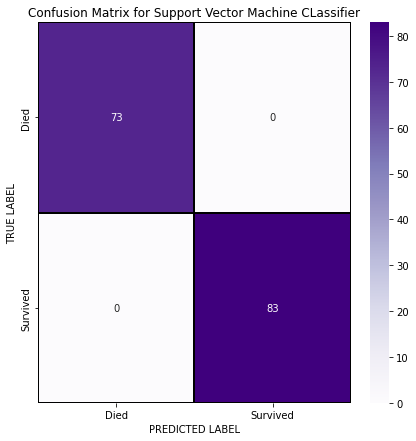

In [75]:
# Lets plot confusion matrix for SVC
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine CLassifier')

#### KNN Classifier

In [76]:
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

1.0
[[73  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        83

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



Text(0.5, 1.0, 'Confusion Matrix for  KNN classifier')

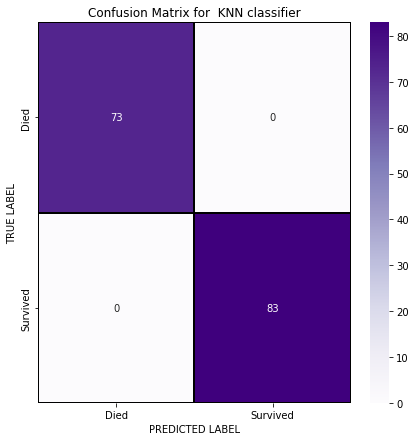

In [77]:
# Lets plot confusion matrix for KNN classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  KNN classifier')

##### Gradient Boosting Classifier

In [78]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

1.0
[[73  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        83

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



Text(0.5, 1.0, 'Confusion Matrix for  Gradient Boosting classifier')

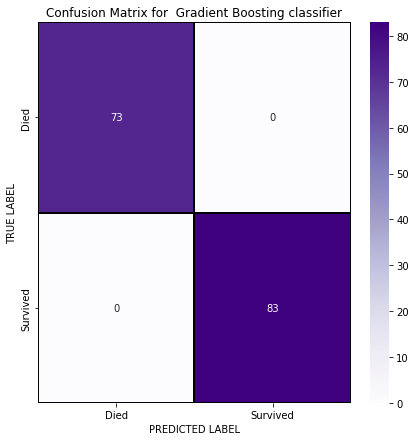

In [79]:
# Lets plot confusion matrix for Gradient Boosting classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Gradient Boosting classifier')

##### Checking the Cross Validation Score

In [80]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

1.0


In [81]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

1.0


In [82]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

1.0


In [83]:
# cv score for Logistic Regression 
print(cross_val_score(LR,x,y,cv=5).mean())

1.0


In [84]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

1.0


In [85]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

1.0


##### Hyper parameter tuning for best model

In [86]:
# Random Forest Classifier
parameters = {'n_estimators':[0,200],
             'criterion':['gini','entropy'],
             'max_depth':np.arange(2,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30,40]}

In [87]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [88]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30, 40],
                         'n_estimators': [0, 200]})

In [89]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'n_estimators': 200}

In [90]:
Titanic_survived = RandomForestClassifier(criterion='gini',max_depth=27, max_features='sqrt', max_leaf_nodes=40, n_estimators=200)
Titanic_survived.fit(x_train, y_train)
pred = Titanic_survived.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


##### Plotting ROC and compare AUC for all the models used

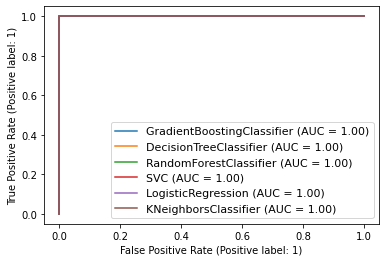

In [91]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(GB,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

##### Saving the model

In [93]:
# Saving the model using .pkl
import joblib
joblib.dump(Titanic_survived,"Titanic.pkl")

['Titanic.pkl']